## Лабораторна робота.  Робота с Pandas.


In [69]:
# !pip install matplotlib

import pandas as pd
import numpy as np

За допомогою бібліотеки Pandas займемося аналізом даних. 

Будемо аналізувати дані про клієнтів банку, який цікавиться, чи відбудеться прострочення платежу на 90 і більше днів при видачі кредиту.


### 1
Прочитайте дані з файлу data.csv

*Функції, які можуть стати в нагоді під час розв'язання: `pd.read_csv(..., delimiter=',')`*

In [82]:
data = pd.read_csv('data.csv', delimiter=',')

### 2
Виведіть опис прочитаних даних. 

*Функції, які можуть стати в нагоді під час розв'язання: `.describe()`*

In [71]:
print(data.describe())

                Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  1350.000000       1350.000000                           1350.000000   
mean    675.500000          0.060000                              3.577895   
std     389.855743          0.237575                             84.914699   
min       1.000000          0.000000                              0.000000   
25%     338.250000          0.000000                              0.031140   
50%     675.500000          0.000000                              0.156891   
75%    1012.750000          0.000000                              0.543145   
max    1350.000000          1.000000                           2340.000000   

               age  NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  \
count  1350.000000                           1350.000000   1350.000000   
mean     52.048889                              0.257778    356.123363   
std      15.009875                              0.751718   1156.603074   
m

### 3
Відобразіть кілька перших та кілька останніх записів.

*Функції, які можуть стати в нагоді під час розв'язання: `.head(), .tail()`*

*Які параметри можна передати цим функціям?*

In [72]:
print(data.head(10))  # перші 10 записів
print(data.tail(5))  # останні 5 записів

   Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   
5   6                 0                              0.213179   74   
6   7                 0                              0.305682   57   
7   8                 0                              0.754464   39   
8   9                 0                              0.116951   27   
9  10                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                     2     0.802982         9120.0   
1                                     0     0.121876         2600.0   
2               

### 4
Наведемо що означають стовпці матриці:

`SeriousDlqin2yrs`
Чи відбудеться прострочення платежу на 90 або більше днів у найближчі 2 роки (Y/N)

`RevolvingUtilizationOnUnsecuredLines`
Відсоток грошей, що залишилися на всіх кредитних картках (%)

`age`
Вік (integer)

`NumberOfTime30-59DaysPastDueNotWorse`
Кількість короткочасних прострочень платежу (30-59 днів) протягом останніх 2 року (integer)

`DebtRatio`
Відсотки від боргу, що виплачуються в місяць, аліменти, побутові витрати, поділені на місячний дохід (якщо місячний дохід невідомий, то абсолютна величина виплат) (%)

`MonthlyIncome`
Місячний прибуток (real)

`NumberOfOpenCreditLinesAndLoans`
Кількість кредитів (або кредитних карток) за винятком іпотеки (integer)

`NumberOfTimes90DaysLate`
Кредитна історія: кількість серйозних прострочень платежу на 90 днів або більше (integer)

`NumberRealEstateLoansOrLines`
Кількість іпотек (integer)

`NumberOfTime60-89DaysPastDueNotWorse`
Кількість середньострокових прострочок платежу (60-89 днів) протягом останніх 2 року (integer)

`NumberOfDependents`
Кількість утриманців у сім'ї, включаючи самого клієнта (integer)





**Якому типу належить кожен стовпець (дійсний, цілий, категоріальний)?**


In [85]:
print(data.dtypes)

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
Debt                                    float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


### 5

Зауважте, що стовпець `DebtRatio` містить неправдоподібні дані. Тільки значення, які відповідають відомому місячному доходу, є відношеннями. Інші – абсолютні значення місячних виплат відсотків.

Виправте дані, зробивши всі значення стовпця `DebtRatio` абсолютними (помножте їх на `MonthlyIncome`). Щоб ваша програма швидко працювала на повних даних, не використовуйте цикл.


#### *Функції, які можуть стати в нагоді під час розв'язання:*

Звернення до елементів DataFrame:
   * елемент: `data.loc[i, 'назваСтовпця']`
   * стовпець: `data['назваСтовпця']`
   * Підматриця: `data.loc[a:b, списокНазвСтовпців]`

Умовна індексація:
* `data.loc[data['стовпець'] > 20, списокНазвСтовпців]`

краще писати так:

* `i = data['стовпець'] > 20` # вектор `True` та `False`
* `data.loc[i, 'назва Стовпця']`

У підматриць номери рядків успадковуються від вихідного.

* `pandas.isnull(скаляр чи масив)` - перевірка, чи є значення невизначеним (`NaN`)
* `pandas.notnull(скаляр чи масив)` - перевірка, чи є значення визначеним (не `NaN`)



In [74]:
data['Debt'] = data['DebtRatio'] * data['MonthlyIncome']
data.loc[pd.isnull(data['MonthlyIncome']), 'Debt'] = data['DebtRatio']

### 6


Змініть ім'я стовпця на`Debt`.

*Функції, які можуть стати в нагоді під час розв'язання: `.rename(columns={'стареІм'я':'новеІм'я'}, inplace=True)`*

In [84]:
data.rename(columns={'DebtRatio': 'Debt'}, inplace=True)

### 7

Обчисліть середній щомісячний дохід і надайте всім клієнтам з невідомим доходом отримане число.

*Функції, які можуть стати в нагоді під час розв'язання: `.mean()`*

*Інші описові статистики:* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [76]:
mean_calc = data['MonthlyIncome'].mean()
data['MonthlyIncome'].fillna(mean_calc, inplace=True)

### 8

Використовуючи метод `groupby`, оцініть ймовірність неповернення кредиту (`SeriousDlqin2yrs=1`) для різних значень кількості утриманців (`NumberOfDependents`).

Виконайте аналогічну процедуру для різних значень стовпця `NumberRealEstateLoansOrLines`

*Підказка:*
`data['стовпець1'].groupby(data['стовпець2']).mean()` *-- розрахунок середніх значень стовпця1 за групами зі стовпця2*


In [77]:
probab_no_repay_dep = data['SeriousDlqin2yrs'].groupby(data['NumberOfDependents']).mean()
probab_no_repay_realest = data['SeriousDlqin2yrs'].groupby(data['NumberRealEstateLoansOrLines']).mean()

print(probab_no_repay_dep)
print(probab_no_repay_realest)

NumberOfDependents
0.0    0.041397
1.0    0.089844
2.0    0.110465
3.0    0.057143
4.0    0.033333
5.0    0.000000
6.0    0.000000
8.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64
NumberRealEstateLoansOrLines
0    0.056863
1    0.048729
2    0.063158
3    0.145455
4    0.105263
5    0.000000
6    1.000000
8    0.000000
Name: SeriousDlqin2yrs, dtype: float64


## Візуалізація даних

In [78]:
import matplotlib.pyplot as plt

#  функція, що дозволяє виводити графіки прямо до ноутбука
%matplotlib inline

Matplotlib дозволяє зручно візуалізувати табличні дані.

*Функції, які можуть стати в нагоді при розв'язанні:*

* Малювання:
    * `plt.plot(x, y)` див. докладніше http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    * `plt.show()`
    * `plt.scatter(x, y)` - графік розсіювання, див. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
    * `plt.hist()` - гістограма, див. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
    
* Малювання декількох графіків на одному:

   `fig, ax = plt.subplots()
    ax.hist(...)
    ax.hist(...)
    plt.show()`
   
* Логарифмічна шкала:
     * `ax.set_xscale('log')` або `ax.set_yscale('log')`
     
* Обмеження області графіка:
     * `ax.axis([x1, x2, y1, y2])`


### 9a

Побудуйте графік розсіювання на осях `age` та `Debt`. Синім позначте клієнтів без серйозних заборгованостей (SeriousDlqin2yrs = 0) і червоним - боржників (SeriousDlqin2yrs = 1).



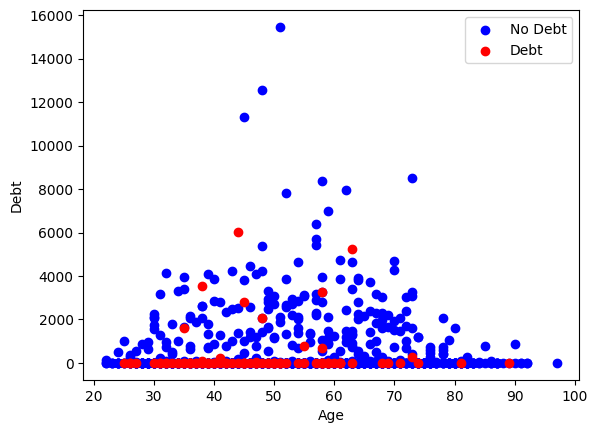

In [89]:
plt.scatter(data[data['SeriousDlqin2yrs'] == 0]['age'], data[data['SeriousDlqin2yrs'] == 0]['Debt'], color='blue', label='No Debt')
plt.scatter(data[data['SeriousDlqin2yrs'] == 1]['age'], data[data['SeriousDlqin2yrs'] == 1]['Debt'], color='red', label='Debt')
plt.xlabel('Age')
plt.ylabel('Debt')
plt.legend()
plt.show()

### 9b

Побудуйте на одному графіку дві нормовані щільності розподілу: червону – для місячного доходу клієнтів із заборгованостями, синю – для місячного доходу клієнтів без заборгованостей. По осі абсцис відобразіть значення до 25000.

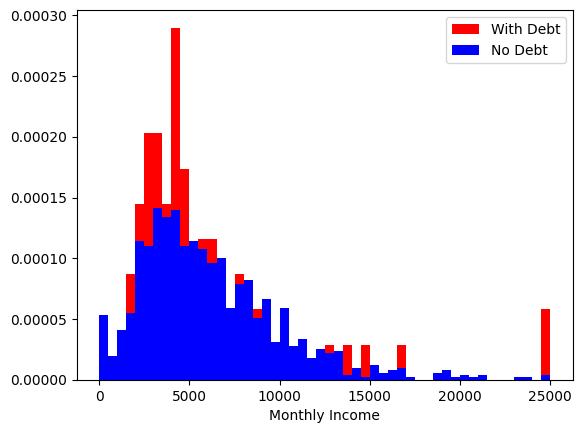

In [90]:
have_debt = data[data['SeriousDlqin2yrs'] == 1]['MonthlyIncome']
no_debt = data[data['SeriousDlqin2yrs'] == 0]['MonthlyIncome']
plt.hist(have_debt, bins=50, range=(0, 25000), density=True, color='red', label='With Debt')
plt.hist(no_debt, bins=50, range=(0, 25000), density=True, color='blue', label='No Debt')
plt.xlabel('Monthly Income')
plt.legend()
plt.show()

### 9c

Візуалізуйте попарні залежності між небінарними ознаками 'age', 'MonthlyIncome', 'NumberOfDependents'. Обмежте місячний дохід значенням 25000.

Які закономірності ви можете спостерігати на графіках?

*Функції, які можуть стати в нагоді під час розв'язання: `pd.plotting.scatter_matrix()`*


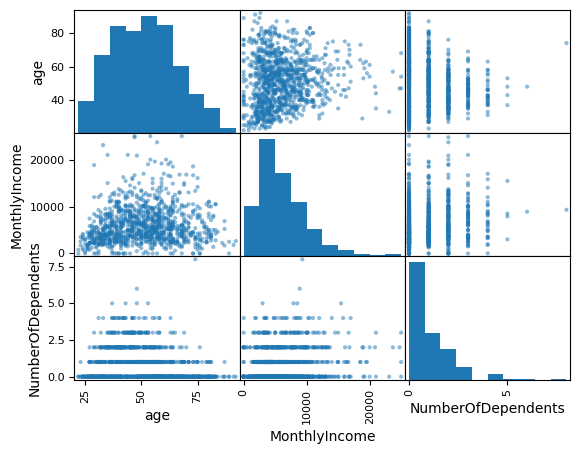

In [94]:
limited_data = data[['age', 'MonthlyIncome', 'NumberOfDependents']]
limited_data = limited_data[limited_data['MonthlyIncome'] <= 25000]

pd.plotting.scatter_matrix(limited_data) # (limited_data, figsize=(10, 10))
plt.show()